<a href="https://colab.research.google.com/github/Tatianabeg/-/blob/main/DZ_9__(%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание 1.
Выберите датасет, который имеет отношение к вашей области интересов или исследований. Датасет должен содержать неструктурированные данные, требующие разметки для решения конкретной задачи, например, анализа настроений или распознавания именованных сущностей. https://www.kaggle.com/datasets/beridzeg45/guardian-environment-related-news?resource=download

In [52]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage import io
import os

In [53]:
from google.colab import drive
drive.mount('/content/drive')

# Путь к zip архиву на яндекс диске
archive_path = '/content/drive/MyDrive/my_archive.zip'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
df = pd.read_csv('guardian_environment_news.csv')

In [55]:
df.head()

,Title,Intro Text,Authors,Article Text,Date Published
0,Liz Truss ‘will approve more oil drilling if ...,Tory leadership candidate criticised by campai...,"['Rob Davies', '@ByRobDavies']",Liz Truss will sign off on a push for more oil...,2022-08-30
1,Renewed Highland golf course plan has environm...,Scottish government rejected a new links at Co...,"['Ewan Murray', '@mrewanmurray']",It is an area so tranquil that the notion of b...,2021-03-22
2,Visiting green spaces deters mental health dr...,Positive effects were stronger among those rep...,"['Damien Gayle', '@damiengayle']","Visits to parks, community gardens and other u...",2023-01-17
3,Bought too much red cabbage? Turn it into a fe...,This fantastic vegan centrepiece makes full us...,['Tom Hunt'],"I devised today’s nut roast for Oddbox, a veg ...",2023-12-22
4,‘This year has been very good’: readers’ UK bu...,Readers share their favourite sightings over t...,['Guardian readers'],‘Constant companions to our gardening’A peacoc...,2023-12-19


## Задание 2.
Выполните разметку на основе правил (rule-based labeling) на подмножестве выбранного датасета. Разработайте и реализуйте набор правил или условий, которые позволят автоматически присваивать метки данным на основе определенных шаблонов или критериев.

In [56]:
optimistic = ['optimistic', 'bright', 'great', 'manageble']
pessimistic = ['drought', 'famine', 'desert', 'danger', ]

In [57]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [58]:
def get_article_mood(text):
    words = nltk.word_tokenize(text.lower())
    optimistic = sum([1 for word in words if word in positive_words])
    pessimistic = sum([1 for word in words if word in negative_words])
    if optimistic > pessimistic:
        return 'positive'
    elif pessimistic > optimistic:
        return 'negative'
    else:
        return 'neutral'

Отделим 2 части от файла для ручной и автоматической разметки:

In [59]:
df_manual = df.iloc[:20]
df_manual.to_csv('first_20_rows.csv', index=False)
df_rulebased = df.iloc[21:1000]
df_rulebased.to_csv('rows_21_1000.csv', index=False)

In [60]:
pip install textblob

In [61]:
from textblob import TextBlob

In [62]:
def get_article_mood(article):
    blob = TextBlob(article)
    return blob.sentiment.polarity

In [63]:
df_rulebased['Article Text'] = df_rulebased['Article Text'].astype(str)

<ipython-input-63-35a65b36f041>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rulebased['Article Text'] = df_rulebased['Article Text'].astype(str)


In [64]:
df_rulebased['mood'] = df_rulebased['Article Text'].apply(get_article_mood)

<ipython-input-64-c4cfb817295c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rulebased['mood'] = df_rulebased['Article Text'].apply(get_article_mood)


In [65]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [66]:
from google.colab import data_table
data_table.disable_dataframe_formatter()

In [67]:
df_rulebased.head()

,Title,Intro Text,Authors,Article Text,Date Published,mood
21,Are debt-for-nature swaps the way forward for ...,Agreements to reduce developing countries’ deb...,"['The age of extinction is supported by', 'Abo...","After decades in the wilderness, and familiar ...",2023-06-21,0.115471
22,Climate protesters gather in person and onlin...,"Campaigners target Standard Chartered, urging ...","['Robyn Vinter', '@robynvinter']",Climate protesters from as many as 60 countrie...,2018-03-09,0.061723
23,There's a simple way to make our cities green...,Architecture’s top prize has been awarded to a...,NaN,This week the highest honour in the architectu...,2018-07-18,0.095566
24,Can we enjoy fast fashion without destroying t...,The global fashion industry is in desperate ne...,['Lucy Siegle'],"This piece first appeared in Down to Earth, th...",2022-02-25,0.100182
25,Anti-logging protest becomes Canada’s biggest...,"At least 866 arrested since April, as police c...","['Supported by', 'About this content', 'Jen Os...",A string of protests against old-growth loggin...,2021-09-10,-0.065854


In [68]:
def get_evaluation(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

In [69]:
df_rulebased['sentiment'] = df_rulebased['mood'].apply(get_evaluation)

<ipython-input-69-666d121682ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rulebased['sentiment'] = df_rulebased['mood'].apply(get_evaluation)


In [70]:
df_rulebased.head()

,Title,Intro Text,Authors,Article Text,Date Published,mood,sentiment
21,Are debt-for-nature swaps the way forward for ...,Agreements to reduce developing countries’ deb...,"['The age of extinction is supported by', 'Abo...","After decades in the wilderness, and familiar ...",2023-06-21,0.115471,positive
22,Climate protesters gather in person and onlin...,"Campaigners target Standard Chartered, urging ...","['Robyn Vinter', '@robynvinter']",Climate protesters from as many as 60 countrie...,2018-03-09,0.061723,positive
23,There's a simple way to make our cities green...,Architecture’s top prize has been awarded to a...,NaN,This week the highest honour in the architectu...,2018-07-18,0.095566,positive
24,Can we enjoy fast fashion without destroying t...,The global fashion industry is in desperate ne...,['Lucy Siegle'],"This piece first appeared in Down to Earth, th...",2022-02-25,0.100182,positive
25,Anti-logging protest becomes Canada’s biggest...,"At least 866 arrested since April, as police c...","['Supported by', 'About this content', 'Jen Os...",A string of protests against old-growth loggin...,2021-09-10,-0.065854,negative


## Задача 3.
Выполните разметку вручную отдельного подмножества выбранного датасета с помощью выбранного вами инструмента разметки.

In [71]:
df_manual.head()

,Title,Intro Text,Authors,Article Text,Date Published
0,Liz Truss ‘will approve more oil drilling if ...,Tory leadership candidate criticised by campai...,"['Rob Davies', '@ByRobDavies']",Liz Truss will sign off on a push for more oil...,2022-08-30
1,Renewed Highland golf course plan has environm...,Scottish government rejected a new links at Co...,"['Ewan Murray', '@mrewanmurray']",It is an area so tranquil that the notion of b...,2021-03-22
2,Visiting green spaces deters mental health dr...,Positive effects were stronger among those rep...,"['Damien Gayle', '@damiengayle']","Visits to parks, community gardens and other u...",2023-01-17
3,Bought too much red cabbage? Turn it into a fe...,This fantastic vegan centrepiece makes full us...,['Tom Hunt'],"I devised today’s nut roast for Oddbox, a veg ...",2023-12-22
4,‘This year has been very good’: readers’ UK bu...,Readers share their favourite sightings over t...,['Guardian readers'],‘Constant companions to our gardening’A peacoc...,2023-12-19


In [72]:
df_manual_marked = pd.read_csv('first_20_rows_marked.csv')

In [73]:
df_manual_marked.head()

,Article Text,Authors,Date Published,Intro Text,Title,annotation_id,annotator,created_at,id,lead_time,sentiment,updated_at
0,Liz Truss will sign off on a push for more oil...,"['Rob Davies', '@ByRobDavies']",2022-08-30,Tory leadership candidate criticised by campai...,Liz Truss ‘will approve more oil drilling if ...,1,1,2024-02-23T14:35:01.566018Z,2,7.051,positive,2024-02-23T14:35:04.301517Z
1,It is an area so tranquil that the notion of b...,"['Ewan Murray', '@mrewanmurray']",2021-03-22,Scottish government rejected a new links at Co...,Renewed Highland golf course plan has environm...,2,1,2024-02-23T14:35:19.797000Z,3,2.153,positive,2024-02-23T14:35:19.797000Z
2,"Visits to parks, community gardens and other u...","['Damien Gayle', '@damiengayle']",2023-01-17,Positive effects were stronger among those rep...,Visiting green spaces deters mental health dr...,3,1,2024-02-23T14:35:31.203768Z,4,2.107,negative,2024-02-23T14:35:31.203768Z
3,"I devised today’s nut roast for Oddbox, a veg ...",['Tom Hunt'],2023-12-22,This fantastic vegan centrepiece makes full us...,Bought too much red cabbage? Turn it into a fe...,4,1,2024-02-23T14:35:54.333312Z,5,2.252,neutral,2024-02-23T14:35:54.333312Z
4,‘Constant companions to our gardening’A peacoc...,['Guardian readers'],2023-12-19,Readers share their favourite sightings over t...,‘This year has been very good’: readers’ UK bu...,5,1,2024-02-23T14:36:04.955091Z,6,1.757,positive,2024-02-23T14:36:04.955091Z


## Задача 4.
Объедините данные, размеченные вручную, с данными, размеченными на основе правил. Объедините два подмножества размеченных данных в один набор данных, сохранив при этом соответствующую структуру и целостность.

In [74]:
drop_columns = ['annotation_id', 'annotator', 'created_at', 'id', 'lead_time', 'updated_at']
df_manual_marked = df_manual_marked.drop(drop_columns, axis=1)

In [75]:
df_manual_marked.head()

,Article Text,Authors,Date Published,Intro Text,Title,sentiment
0,Liz Truss will sign off on a push for more oil...,"['Rob Davies', '@ByRobDavies']",2022-08-30,Tory leadership candidate criticised by campai...,Liz Truss ‘will approve more oil drilling if ...,positive
1,It is an area so tranquil that the notion of b...,"['Ewan Murray', '@mrewanmurray']",2021-03-22,Scottish government rejected a new links at Co...,Renewed Highland golf course plan has environm...,positive
2,"Visits to parks, community gardens and other u...","['Damien Gayle', '@damiengayle']",2023-01-17,Positive effects were stronger among those rep...,Visiting green spaces deters mental health dr...,negative
3,"I devised today’s nut roast for Oddbox, a veg ...",['Tom Hunt'],2023-12-22,This fantastic vegan centrepiece makes full us...,Bought too much red cabbage? Turn it into a fe...,neutral
4,‘Constant companions to our gardening’A peacoc...,['Guardian readers'],2023-12-19,Readers share their favourite sightings over t...,‘This year has been very good’: readers’ UK bu...,positive


In [76]:
df_rulebased = df_rulebased.drop('mood', axis=1)

In [77]:
df_rulebased.head()

,Title,Intro Text,Authors,Article Text,Date Published,sentiment
21,Are debt-for-nature swaps the way forward for ...,Agreements to reduce developing countries’ deb...,"['The age of extinction is supported by', 'Abo...","After decades in the wilderness, and familiar ...",2023-06-21,positive
22,Climate protesters gather in person and onlin...,"Campaigners target Standard Chartered, urging ...","['Robyn Vinter', '@robynvinter']",Climate protesters from as many as 60 countrie...,2018-03-09,positive
23,There's a simple way to make our cities green...,Architecture’s top prize has been awarded to a...,NaN,This week the highest honour in the architectu...,2018-07-18,positive
24,Can we enjoy fast fashion without destroying t...,The global fashion industry is in desperate ne...,['Lucy Siegle'],"This piece first appeared in Down to Earth, th...",2022-02-25,positive
25,Anti-logging protest becomes Canada’s biggest...,"At least 866 arrested since April, as police c...","['Supported by', 'About this content', 'Jen Os...",A string of protests against old-growth loggin...,2021-09-10,negative


In [78]:
df_merged = pd.concat([df_manual_marked, df_rulebased])

In [79]:
df_merged.head()

,Article Text,Authors,Date Published,Intro Text,Title,sentiment
0,Liz Truss will sign off on a push for more oil...,"['Rob Davies', '@ByRobDavies']",2022-08-30,Tory leadership candidate criticised by campai...,Liz Truss ‘will approve more oil drilling if ...,positive
1,It is an area so tranquil that the notion of b...,"['Ewan Murray', '@mrewanmurray']",2021-03-22,Scottish government rejected a new links at Co...,Renewed Highland golf course plan has environm...,positive
2,"Visits to parks, community gardens and other u...","['Damien Gayle', '@damiengayle']",2023-01-17,Positive effects were stronger among those rep...,Visiting green spaces deters mental health dr...,negative
3,"I devised today’s nut roast for Oddbox, a veg ...",['Tom Hunt'],2023-12-22,This fantastic vegan centrepiece makes full us...,Bought too much red cabbage? Turn it into a fe...,neutral
4,‘Constant companions to our gardening’A peacoc...,['Guardian readers'],2023-12-19,Readers share their favourite sightings over t...,‘This year has been very good’: readers’ UK bu...,positive


## Задача 5.
Обучите модель машинного обучения, используя объединенный набор размеченных данных. Разделите датасет на обучающий и тестовый наборы и используйте обучающий набор для обучения модели.

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

In [81]:
df_merged['sentiment'] = df_merged['sentiment'].replace({'negative': 0, 'neutral': 0, 'positive': 1})

<Axes: >

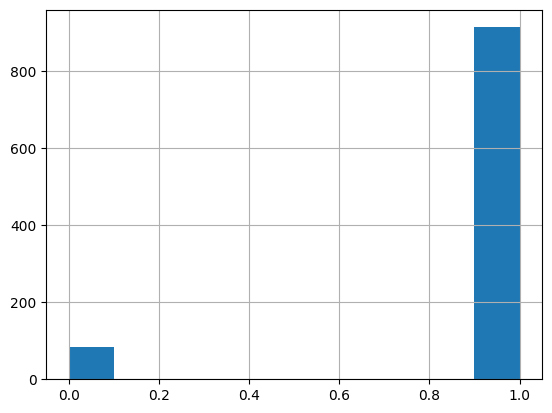

In [82]:
df_merged['sentiment'].hist()

In [141]:
df_merged = shuffle(df_merged)

In [142]:
labeled_reviews, unlabeled_reviews = train_test_split(df_merged, train_size=0.3, random_state=41)

In [143]:
def train_model(labeled_reviews):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(labeled_reviews['Article Text'])
    y = labeled_reviews['sentiment']

    model = LogisticRegression()
    model.fit(X, y)

    return model, vectorizer

In [144]:
model, vectorizer = train_model(labeled_reviews)

In [145]:
X_unlabeled = vectorizer.transform(unlabeled_reviews['Article Text'])
y_unlabeled_predicted = model.predict(X_unlabeled)

In [146]:
y_unlabeled_proba = model.predict_proba(X_unlabeled)
uncertainty = -(y_unlabeled_proba * np.log2(y_unlabeled_proba)).sum(axis=1)

In [147]:
labeled_reviews_new = unlabeled_reviews.iloc[uncertainty.argsort()[:100]]
unlabeled_reviews_new = unlabeled_reviews.iloc[uncertainty.argsort()[100:]]

In [148]:
labeled_reviews = pd.concat([labeled_reviews, labeled_reviews_new])

In [149]:
model, vectorizer = train_model(labeled_reviews)

## Задача 6.
Оценить эффективность обученной модели на тестовом датасете. Используйте подходящие метрики оценки. Интерпретируйте результаты и проанализируйте эффективность модели в решении задачи разметки.

In [150]:
df_manual_marked['sentiment'] = df_manual_marked['sentiment'].replace({'negative': 0, 'neutral': 0, 'positive': 1})

In [151]:
X_test = vectorizer.transform(df_manual_marked['Article Text'])
y_test_predicted = model.predict(X_test)
f1 = f1_score(df_manual_marked['sentiment'], y_test_predicted)

print(f1)

0.6666666666666666


# 0.67  F1-score - не высокий результат